In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [19]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
epochs = 5
batch_size = 32

history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 24s 13ms/step - loss: 0.1563 - accuracy: 0.9528 - val_loss: 0.0485 - val_accuracy: 0.9873
Epoch 2/5
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0505 - accuracy: 0.9840 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 3/5
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0459 - val_accuracy: 0.9870
Epoch 4/5
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.0386 - val_accuracy: 0.9890
Epoch 5/5
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.0361 - val_accuracy: 0.9898


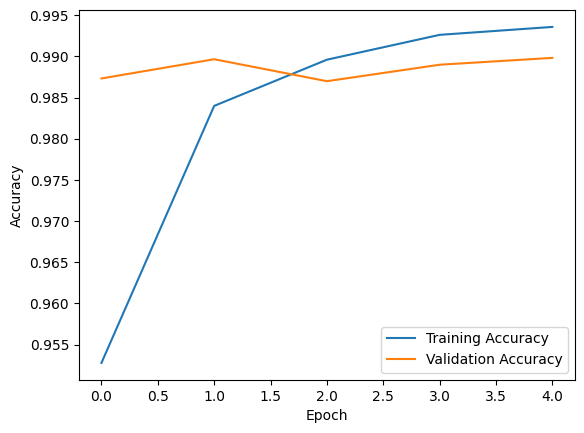

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0299 - accuracy: 0.9906


[0.02988607808947563, 0.9905999898910522]

In [25]:
y_predicted_by_model = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [26]:
y_predicted_by_model[0]

array([9.5582706e-08, 4.9837407e-08, 7.3635107e-08, 2.6610756e-05,
       7.1563146e-12, 8.7215235e-10, 1.1865977e-11, 9.9983871e-01,
       1.1359601e-08, 1.3453876e-04], dtype=float32)

In [29]:
np.argmax(y_predicted_by_model[5])

1

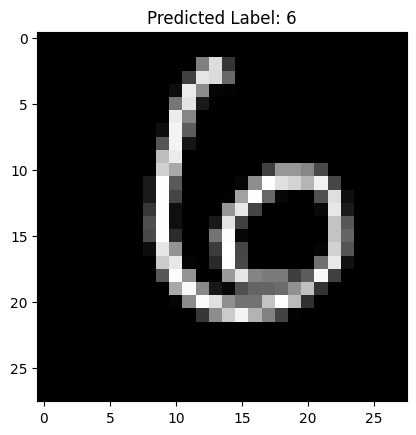

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'y_predicted_by_model' contains the predicted probabilities for the test data
# Replace 'your_index' with the index of the sample you want to visualize (0 to 9999)
index_to_visualize = 100

# Find the predicted label
predicted_label_index = np.argmax(y_predicted_by_model[index_to_visualize])
predicted_label = predicted_label_index

# Get the corresponding image from the test data
image_to_visualize = test_images[index_to_visualize][:, :, 0]

# Plot the image
plt.imshow(image_to_visualize, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()